In [291]:
import pandas as pd
import numpy as np
df=pd.read_csv('AP FnB - Disney.csv')

In [292]:
df.head()

,source_id,PassType,is_renewal,ORDER_ID,business_date,open_date_time,close_date_time,menu_item_name1,net_amt,QUANTITY
0,4364,Diamond,1,132546,12/22/19,10:36:12 AM,10:37:43 AM,Weekend Brunch,557.0,2
1,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,BBQ Pork Rib with Drink,176.0,2
2,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,Barbossas BBQ Pork Ribs,0.0,2
3,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,Pepsi Cola (Cup),0.0,1
4,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,7UP (Cup),0.0,1


In [293]:
df.isna().sum()

source_id          0
PassType           0
is_renewal         0
ORDER_ID           0
business_date      0
open_date_time     0
close_date_time    0
menu_item_name1    0
net_amt            0
QUANTITY           0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21077 entries, 0 to 21076
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        21077 non-null  int64  
 1   PassType         21077 non-null  object 
 2   is_renewal       21077 non-null  int64  
 3   ORDER_ID         21077 non-null  int64  
 4   business_date    21077 non-null  object 
 5   open_date_time   21077 non-null  object 
 6   close_date_time  21077 non-null  object 
 7   menu_item_name1  21077 non-null  object 
 8   net_amt          21077 non-null  float64
 9   QUANTITY         21077 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.6+ MB


In [83]:
df.describe(include=object)

,PassType,business_date,open_date_time,close_date_time,menu_item_name1
count,21077,21077,21077,21077,21077
unique,3,7,2628,2634,334
top,Gold,12/22/19,11:57:26 AM,1:03:14 PM,==Specialty Drink Skip==
freq,14952,8018,170,170,3575


In [242]:
df1['PassType'].value_counts()

Gold       3712
Diamond    1011
Silver      698
Name: PassType, dtype: int64

# Buyers who renewed

In [84]:
#buyers who renewed
df1=df[df['is_renewal']==1]
df1

,source_id,PassType,is_renewal,ORDER_ID,business_date,open_date_time,close_date_time,menu_item_name1,net_amt,QUANTITY
0,4364,Diamond,1,132546,12/22/19,10:36:12 AM,10:37:43 AM,Weekend Brunch,557.0,2
1,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,BBQ Pork Rib with Drink,176.0,2
2,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,Barbossas BBQ Pork Ribs,0.0,2
3,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,Pepsi Cola (Cup),0.0,1
4,4364,Diamond,1,266019,12/24/19,11:50:39 AM,11:51:58 AM,7UP (Cup),0.0,1
...,...,...,...,...,...,...,...,...,...,...
20909,206882,Gold,1,241767,12/28/19,6:37:39 PM,6:38:10 PM,Seafood Laksa with Drink,68.0,1
20910,206882,Gold,1,241767,12/28/19,6:37:39 PM,6:38:10 PM,Seafood Laksa,0.0,1
20911,206882,Gold,1,241767,12/28/19,6:37:39 PM,6:38:10 PM,Mirinda Orange (Cup),0.0,1
20912,206882,Gold,1,241767,12/28/19,6:37:39 PM,6:38:10 PM,==Specialty Drink Skip==,0.0,1


In [269]:
df1.describe(include=object)

,PassType,business_date,open_date_time,close_date_time,menu_item_name1
count,5421,5421,5421,5421,5421
unique,3,7,715,711,238
top,Gold,12/22/19,5:54:53 PM,7:15:46 PM,==Specialty Drink Skip==
freq,3712,2062,52,52,893


<function matplotlib.pyplot.show(close=None, block=None)>

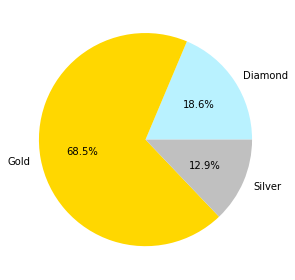

In [259]:
#percentage of each tier
import matplotlib.pyplot as plt
tiers=['Diamond','Gold','Silver']
diam=len(df1[df1['PassType']=='Diamond'])
gold=len(df1[df1['PassType']=='Gold'])
silver=len(df1[df1['PassType']=='Silver'])
data=[diam,gold,silver]
plt.pie(data, labels = tiers,autopct='%1.1f%%',colors = ['#b9f2ff','#FFD700','#C0C0C0'])
plt.tight_layout()

plt.show

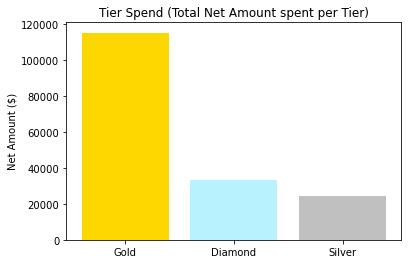

In [304]:
#spending per each tier - total
goldcount=df1.loc[df['PassType'] == 'Gold', 'net_amt'].sum()
diamondcount=df1.loc[df['PassType'] == 'Diamond', 'net_amt'].sum()
silvercount=df1.loc[df['PassType'] == 'Silver', 'net_amt'].sum()

namelist=['Gold','Diamond','Silver']
countlist=[goldcount,diamondcount,silvercount]
plt.bar(namelist,countlist,color = ['#FFD700','#b9f2ff','#C0C0C0'])
plt.title('Tier Spend (Total Net Amount spent per Tier)')
plt.ylabel("Net Amount ($)")
plt.show()

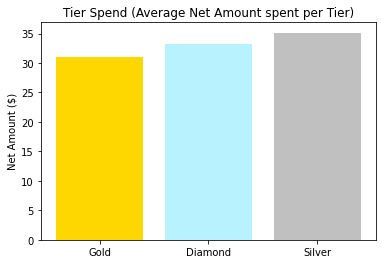

In [305]:
#spending per each tier - average
goldcount=df1.loc[df['PassType'] == 'Gold', 'net_amt'].mean()
diamondcount=df1.loc[df['PassType'] == 'Diamond', 'net_amt'].mean()
silvercount=df1.loc[df['PassType'] == 'Silver', 'net_amt'].mean()

namelist=['Gold','Diamond','Silver']
countlist=[goldcount,diamondcount,silvercount]
plt.bar(namelist,countlist,color = ['#FFD700','#b9f2ff','#C0C0C0'])
plt.title('Tier Spend (Average Net Amount spent per Tier)')
plt.ylabel("Net Amount ($)")
plt.show()

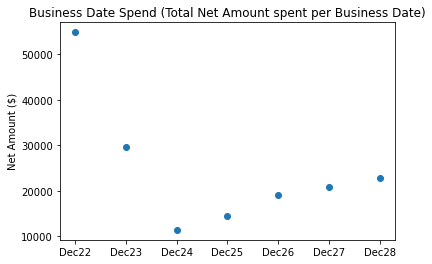

In [308]:
#spending per each business date - total
dec22=df1.loc[df['business_date'] == '12/22/19', 'net_amt'].sum()
dec23=df1.loc[df['business_date'] == '12/23/19', 'net_amt'].sum()
dec24=df1.loc[df['business_date'] == '12/24/19', 'net_amt'].sum()
dec25=df1.loc[df['business_date'] == '12/25/19', 'net_amt'].sum()
dec26=df1.loc[df['business_date'] == '12/26/19', 'net_amt'].sum()
dec27=df1.loc[df['business_date'] == '12/27/19', 'net_amt'].sum()
dec28=df1.loc[df['business_date'] == '12/28/19', 'net_amt'].sum()

namelist=['Dec22','Dec23','Dec24','Dec25','Dec26','Dec27','Dec28']
countlist=[dec22,dec23,dec24,dec25,dec26,dec27,dec28]
plt.scatter(namelist,countlist)
plt.title('Business Date Spend (Total Net Amount spent per Business Date)')
plt.ylabel("Net Amount ($)")
plt.show()

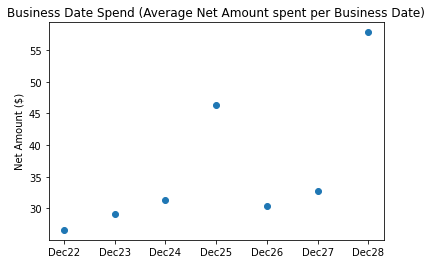

In [309]:
#spending per each business date - average
dec22=df1.loc[df['business_date'] == '12/22/19', 'net_amt'].mean()
dec23=df1.loc[df['business_date'] == '12/23/19', 'net_amt'].mean()
dec24=df1.loc[df['business_date'] == '12/24/19', 'net_amt'].mean()
dec25=df1.loc[df['business_date'] == '12/25/19', 'net_amt'].mean()
dec26=df1.loc[df['business_date'] == '12/26/19', 'net_amt'].mean()
dec27=df1.loc[df['business_date'] == '12/27/19', 'net_amt'].mean()
dec28=df1.loc[df['business_date'] == '12/28/19', 'net_amt'].mean()

namelist=['Dec22','Dec23','Dec24','Dec25','Dec26','Dec27','Dec28']
countlist=[dec22,dec23,dec24,dec25,dec26,dec27,dec28]
plt.scatter(namelist,countlist)
plt.title('Business Date Spend (Average Net Amount spent per Business Date)')
plt.ylabel("Net Amount ($)")
plt.show()

In [119]:
#sorting by each individual buyer id and what they bought
d=df1['ORDER_ID'].unique()
source_id=[]
PassType=[]
business_date=[]
open_date_time=[]
close_date_time=[]
menu_item_name1=[]
net_amt=[]
QUANTITY=[]

for i in d:
    group=df1['ORDER_ID']==i
    #print(data[group])
    dgroup=df1[group]
   # print(i,sum(dgroup['item_count']))
   # print(i,dgroup['time'].unique())
    net_amt+=[sum(dgroup['net_amt'])]
    QUANTITY+=[sum(dgroup['QUANTITY'])]
    source_id+=[dgroup['source_id'].unique()]
    PassType+=[dgroup['PassType'].unique()]
    business_date+=[dgroup['business_date'].unique()]
    open_date_time+=[dgroup['open_date_time'].unique()]
    close_date_time+=[dgroup['close_date_time'].unique()]
    menu_item_name1+=[dgroup['menu_item_name1'].unique()]
    
   





    


In [120]:
ordertotal={'ORDER_ID':d,
                 'source_id':source_id,
                 'PassType':PassType,
                 'business_date':business_date,
                 'open_date_time':open_date_time,
                 'close_date_time':close_date_time,
                 'menu_item_name1':menu_item_name1,
     'net_amt':net_amt,
     'QUANTITY':QUANTITY}
df2=pd.DataFrame(ordertotal)
df2

,ORDER_ID,source_id,PassType,business_date,open_date_time,close_date_time,menu_item_name1,net_amt,QUANTITY
0,132546,[4364],[Diamond],[12/22/19],[10:36:12 AM],[10:37:43 AM],[Weekend Brunch],557.0,2
1,266019,[4364],[Diamond],[12/24/19],[11:50:39 AM],[11:51:58 AM],"[BBQ Pork Rib with Drink, Barbossas BBQ Pork R...",244.0,12
2,46922,[4381],[Silver],[12/22/19],[12:33:48 PM],[12:35:48 PM],"[Turkey Leg Rice with Dri, Turkey Leg with Fri...",233.0,9
3,49938,[4501],[Gold],[12/26/19],[2:24:40 PM],[2:25:13 PM],"[Grilled Beef with Drink, Grilled Beef with Sp...",72.0,4
4,121228,[4535],[Diamond],[12/23/19],[3:39:25 PM],[3:39:43 PM],"[BBQ Pork Rib with Drink, Barbossas BBQ Pork R...",88.0,4
...,...,...,...,...,...,...,...,...,...
713,583,[206706],[Gold],[12/27/19],[8:13:32 PM],[8:14:16 PM],"[Grilled Chicken with Dri, Satay Chicken Wings...",146.0,9
714,129154,[206875],[Gold],[12/28/19],[3:26:13 PM],[3:26:48 PM],"[Lamb Ribs Noodle with Dr, Braised Lamb Ribs N...",189.0,12
715,3019,[206876],[Silver],[12/28/19],[6:20:11 PM],[6:21:13 PM],"[Turkey Leg Rice with Dri, Turkey Leg with Fri...",149.0,8
716,166463,[206881],[Gold],[12/28/19],[6:29:50 PM],[6:30:24 PM],"[Tomato Beef Rice with Dr, Tomato Beef Brisket...",116.0,4


# Buyers who didn't renew

In [121]:
df3=df[df['is_renewal']==0]
df3

,source_id,PassType,is_renewal,ORDER_ID,business_date,open_date_time,close_date_time,menu_item_name1,net_amt,QUANTITY
19,4396,Diamond,0,76539,12/26/19,2:00:47 PM,2:01:04 PM,Seafood Laksa with Drink,68.00,1
20,4396,Diamond,0,76539,12/26/19,2:00:47 PM,2:01:04 PM,Seafood Laksa,0.00,1
21,4396,Diamond,0,76539,12/26/19,2:00:47 PM,2:01:04 PM,Pepsi Cola (Cup),0.00,1
22,4396,Diamond,0,76539,12/26/19,2:00:47 PM,2:01:04 PM,==Specialty Drink Skip==,0.00,1
23,4448,Gold,0,154589,12/22/19,8:54:49 AM,8:58:58 AM,Breakfast Kids Buffet,134.00,1
...,...,...,...,...,...,...,...,...,...,...
21072,206948,Gold,0,1040983,12/28/19,7:10:15 PM,7:10:41 PM,BBQ Pork Pizza with Drin,70.14,1
21073,206948,Gold,0,1040983,12/28/19,7:10:15 PM,7:10:41 PM,BBQ Pork Pineapple Pizza,0.00,1
21074,206948,Gold,0,1040983,12/28/19,7:10:15 PM,7:10:41 PM,Pepsi Cola (Cup),0.00,1
21075,206948,Gold,0,1040983,12/28/19,7:10:15 PM,7:10:41 PM,==Specialty Drink Skip==,0.00,1


In [270]:
df3.describe(include=object)

,PassType,business_date,open_date_time,close_date_time,menu_item_name1
count,15656,15656,15656,15656,15656
unique,3,7,1966,1965,323
top,Gold,12/22/19,11:57:26 AM,1:03:14 PM,==Specialty Drink Skip==
freq,11240,5956,170,170,2682


<function matplotlib.pyplot.show(close=None, block=None)>

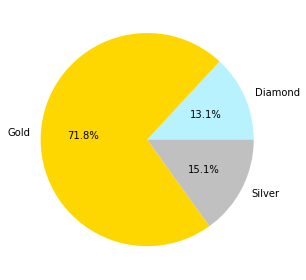

In [260]:
#visualization plots
import matplotlib.pyplot as plt
tiers=['Diamond','Gold','Silver']
diam=len(df3[df3['PassType']=='Diamond'])
gold=len(df3[df3['PassType']=='Gold'])
silver=len(df3[df3['PassType']=='Silver'])
data=[diam,gold,silver]
plt.pie(data, labels = tiers,autopct='%1.1f%%',colors = ['#b9f2ff','#FFD700','#C0C0C0'])
plt.tight_layout()

plt.show

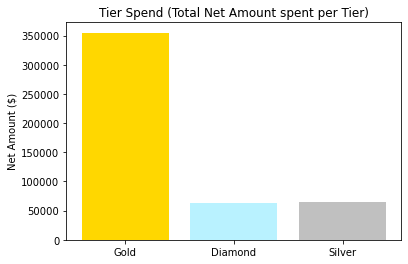

In [310]:
#spending per each tier - total
goldcount=df3.loc[df['PassType'] == 'Gold', 'net_amt'].sum()
diamondcount=df3.loc[df['PassType'] == 'Diamond', 'net_amt'].sum()
silvercount=df3.loc[df['PassType'] == 'Silver', 'net_amt'].sum()

namelist=['Gold','Diamond','Silver']
countlist=[goldcount,diamondcount,silvercount]
plt.bar(namelist,countlist,color = ['#FFD700','#b9f2ff','#C0C0C0'])
plt.title('Tier Spend (Total Net Amount spent per Tier)')
plt.ylabel("Net Amount ($)")
plt.show()

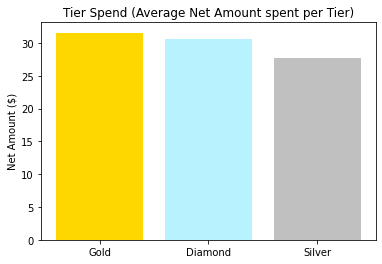

In [311]:
#spending per each tier - average
goldcount=df3.loc[df['PassType'] == 'Gold', 'net_amt'].mean()
diamondcount=df3.loc[df['PassType'] == 'Diamond', 'net_amt'].mean()
silvercount=df3.loc[df['PassType'] == 'Silver', 'net_amt'].mean()

namelist=['Gold','Diamond','Silver']
countlist=[goldcount,diamondcount,silvercount]
plt.bar(namelist,countlist,color = ['#FFD700','#b9f2ff','#C0C0C0'])
plt.title('Tier Spend (Average Net Amount spent per Tier)')
plt.ylabel("Net Amount ($)")
plt.show()

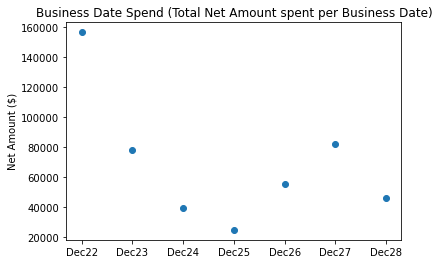

In [312]:
#spending per each business date - total
dec22=df3.loc[df['business_date'] == '12/22/19', 'net_amt'].sum()
dec23=df3.loc[df['business_date'] == '12/23/19', 'net_amt'].sum()
dec24=df3.loc[df['business_date'] == '12/24/19', 'net_amt'].sum()
dec25=df3.loc[df['business_date'] == '12/25/19', 'net_amt'].sum()
dec26=df3.loc[df['business_date'] == '12/26/19', 'net_amt'].sum()
dec27=df3.loc[df['business_date'] == '12/27/19', 'net_amt'].sum()
dec28=df3.loc[df['business_date'] == '12/28/19', 'net_amt'].sum()

namelist=['Dec22','Dec23','Dec24','Dec25','Dec26','Dec27','Dec28']
countlist=[dec22,dec23,dec24,dec25,dec26,dec27,dec28]
plt.scatter(namelist,countlist)
plt.title('Business Date Spend (Total Net Amount spent per Business Date)')
plt.ylabel("Net Amount ($)")
plt.show()

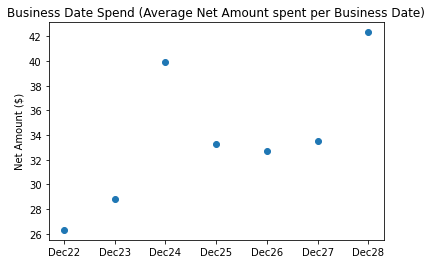

In [313]:
#spending per each business date - average
dec22=df3.loc[df['business_date'] == '12/22/19', 'net_amt'].mean()
dec23=df3.loc[df['business_date'] == '12/23/19', 'net_amt'].mean()
dec24=df3.loc[df['business_date'] == '12/24/19', 'net_amt'].mean()
dec25=df3.loc[df['business_date'] == '12/25/19', 'net_amt'].mean()
dec26=df3.loc[df['business_date'] == '12/26/19', 'net_amt'].mean()
dec27=df3.loc[df['business_date'] == '12/27/19', 'net_amt'].mean()
dec28=df3.loc[df['business_date'] == '12/28/19', 'net_amt'].mean()

namelist=['Dec22','Dec23','Dec24','Dec25','Dec26','Dec27','Dec28']
countlist=[dec22,dec23,dec24,dec25,dec26,dec27,dec28]
plt.scatter(namelist,countlist)
plt.title('Business Date Spend (Average Net Amount spent per Business Date)')
plt.ylabel("Net Amount ($)")
plt.show()

In [122]:
d=df3['ORDER_ID'].unique()
source_id=[]
PassType=[]
business_date=[]
open_date_time=[]
close_date_time=[]
menu_item_name1=[]
net_amt=[]
QUANTITY=[]

for i in d:
    group=df3['ORDER_ID']==i
    #print(data[group])
    dgroup=df3[group]
   # print(i,sum(dgroup['item_count']))
   # print(i,dgroup['time'].unique())
    net_amt+=[sum(dgroup['net_amt'])]
    QUANTITY+=[sum(dgroup['QUANTITY'])]
    source_id+=[dgroup['source_id'].unique()]
    PassType+=[dgroup['PassType'].unique()]
    business_date+=[dgroup['business_date'].unique()]
    open_date_time+=[dgroup['open_date_time'].unique()]
    close_date_time+=[dgroup['close_date_time'].unique()]
    menu_item_name1+=[dgroup['menu_item_name1'].unique()]

In [123]:
ordertotal1={'ORDER_ID':d,
                 'source_id':source_id,
                 'PassType':PassType,
                 'business_date':business_date,
                 'open_date_time':open_date_time,
                 'close_date_time':close_date_time,
                 'menu_item_name1':menu_item_name1,
     'net_amt':net_amt,
     'QUANTITY':QUANTITY}
df4=pd.DataFrame(ordertotal1)
df4

,ORDER_ID,source_id,PassType,business_date,open_date_time,close_date_time,menu_item_name1,net_amt,QUANTITY
0,76539,[4396],[Diamond],[12/26/19],[2:00:47 PM],[2:01:04 PM],"[Seafood Laksa with Drink, Seafood Laksa, Peps...",68.0,4
1,154589,[4448],[Gold],[12/22/19],[8:54:49 AM],[8:58:58 AM],[Breakfast Kids Buffet],134.0,1
2,34754,[4929],[Gold],[12/23/19],[6:51:43 PM],[6:52:17 PM],"[Seafood Laksa with Drink, Seafood Laksa, Peac...",136.0,8
3,221200,[4989],[Gold],[12/22/19],[4:25:17 PM],[4:26:21 PM],"[Pork Ramen with Drink, Pork Ramen Soup, KSF W...",60.0,4
4,119634,[5095],[Diamond],[12/27/19],[4:42:40 PM],[6:46:04 PM],"[Bread Basket for Lunch/D, Adult Set (3 Course...",724.0,15
...,...,...,...,...,...,...,...,...,...
2028,143594,[206916],[Silver],[12/28/19],[8:07:40 PM],[8:08:23 PM],"[Kids Meat Balls with Dri, Meat Balls (K), Fut...",63.0,5
2029,193866,[206923],[Silver],[12/28/19],[6:13:26 PM],[6:14:06 PM],"[BBQ Pork Rib with Drink, Barbossas BBQ Pork R...",178.0,9
2030,128937,[206929],[Gold],[12/28/19],[5:27:29 PM],[6:43:17 PM],"[Adult Set (3 Courses), Pork Rib Soup, SlOW CO...",2155.0,36
2031,1040982,[206931],[Diamond],[12/28/19],[6:05:20 PM],[6:06:39 PM],"[Mushroom Chicken Rice wi, Cream Mushroom Chic...",142.0,5
